# Project 1: Demographics and Education
## Cleaning and Exploring Data with Pandas
## Due Date: 
## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.


**Collaborators**: *list collaborators here*


## This Assignment

In recent years, the positively correlated and multifaceted relationship between educational attainment and a given person's race in the United States has been emphasized as one of the main causes of racial income gap and generational poverty. Nonetheless, despite numerous intervention efforts made by the government and the private sector, the extent of the problem has remained pervasive and convoluted to this day.

In this project, you will investigate data regarding student demographics and educational attainment for public schools in the state of California. The information have been made available by the California Department of Education. The main goal for this assignment is to understand the relationship between demographics and education. We will walk through various steps of exploratory data analysis to do this, and provide comments and insights along the way to give you a sense of how we arrive at each discovery and what next steps it leads to.

As we clean and explore these data, you will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Applying probability sampling techniques
* Exploring characteristics and distributions of individual variables

## Score Breakdown
Question | Points
--- | ---
Total | 0

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

---
## 1: Loading Public Schools Data

We have data, but we don't have any specific questions about the data yet, so let's focus on understanding the structure of the data. This involves answering questions such as:

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

### Question 1a: Reading in the Files

Based on the above information, let's attempt to load `pubschls.csv`, `frpm1819.csv`, and `sat18.csv` into pandas data frames with the following names: `sch`, `frpm`, and `sat` respectively.

In [20]:
sch = pd.read_csv('Data/pubschls.txt', sep="\t")
sch = sch.loc[sch['StatusType']=='Active']
sch = sch.replace('No Data', np.NaN)
sch = sch[['CDSCode','County','District','School','Street','City',\
           'Zip','State','Phone','WebSite','SOC','SOCType']]

act = pd.read_excel('Data/act18.xls')
act = act[['cds','NumTstTakr','AvgScrEng','AvgScrRead','AvgScrMath','AvgScrSci']]

sch = pd.merge(sch, act, left_on='CDSCode', right_on='cds', how='left')

dem = pd.read_csv('Data/filesenr.txt', sep='\t')
dem = dem[['CDS_CODE','ETHNIC','GENDER','ENR_TOTAL']]

Now that you've read in the files, let's try some `pd.DataFrame` methods ([docs](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)).
Use the `DataFrame.head` method to show the top few lines of the `sch`, `frpm`, and `sat` dataframes. Use `Dataframe.describe` to learn about the numeric columns.

In [21]:
print(sch.head())
print(dem.head())

         CDSCode   County                            District  \
0  1100170000000  Alameda  Alameda County Office of Education   
1  1100170112607  Alameda  Alameda County Office of Education   
2  1100170123968  Alameda  Alameda County Office of Education   
3  1100170124172  Alameda  Alameda County Office of Education   
4  1100170125567  Alameda  Alameda County Office of Education   

                                    School                        Street  \
0                                      NaN        313 West Winton Avenue   
1   Envision Academy for Arts & Technology           1515 Webster Street   
2  Community School for Creative Education  2111 International Boulevard   
3                          Yu Ming Charter          1086 Alcatraz Avenue   
4                 Urban Montessori Charter             5328 Brann Street   

      City         Zip State           Phone  \
0  Hayward  94544-1136    CA  (510) 887-0152   
1  Oakland  94612-3355    CA  (510) 596-8901   
2  Oakla

The `DataFrame.describe` method can also be handy for computing summaries of various statistics of our dataframes. Try it out with each of our 3 dataframes.

In [23]:
print(sch.describe())
print(act.describe())

            CDSCode           cds    NumTstTakr
count  1.176000e+04  2.114000e+03   2114.000000
mean   2.942944e+13  2.919304e+13     94.595080
std    1.428559e+13  1.436404e+13    301.218424
min    1.100170e+12  1.100170e+12      0.000000
25%    1.964733e+13  1.964725e+13      6.000000
50%    3.066670e+13  3.066621e+13     40.000000
75%    3.868479e+13  3.868478e+13    102.750000
max    5.872770e+13  5.872770e+13  11607.000000
                cds     NumTstTakr
count  2.208000e+03    2208.000000
mean   2.915714e+13     181.385417
std    1.444040e+13    2256.131657
min    0.000000e+00       0.000000
25%    1.964725e+13       6.000000
50%    3.066597e+13      40.000000
75%    3.868478e+13     107.000000
max    5.872770e+13  100197.000000


### Question 1b: Identifying Issues with the Data

Use the `head` command on your three files again. This time, describe at least one potential problem with the data you see. Consider issues with missing values and bad data.

We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables individually. Let's begin with the pubschls file, which has been read into the `sch` dataframe.

---
## 2: Examining the Public Schools Data

From its name alone, we expect the `pubschls.csv` file to contain information about the public schools in the state of California. Let's investigate the granularity of this dataset.

### Question 2a

Examining the entries in `sch`, is the `CDSCode` (this 14-digit code is the official, unique identification of a school within California) unique for each record? Your code should compute the answer, i.e. don't just hard code `True` or `False`.

Hint: use `value_counts()` or `unique()` to determine if the `CDSCode` series has any duplicates.

In [6]:
is_school_id_unique = True not in (sch['CDSCode'].value_counts() != 1)
is_school_id_unique

True

### Question 2b

With this information, you can address the question of granularity. Answer the questions below.

1. What does each record represent?  
1. What is the primary key?
1. What would you find by grouping by the following columns: `CDSCode`, `Zip`, `State`?

Please write your answer in the markdown cell below. You may create new cells below your answer to run code, but **please never add cells between a question cell and the answer cell below it.**

*Answer Example*

1. *Each record represents an instance of registered public school.*
2. *CDSCode*
3. *With CDSCode, we would find the same table as the original schools table because it appears that CDSCode is unique to each school. With Zip, we would find instances sharing the same postal code appear together under the same group, though it sounds unlikely that we would find such a case. With State, we would find schools located in the same state.*

---
## 3: Data Cleaning

Next, let's  explore some of the variables in the schools table. We begin by examining the SOC Types (the text description of the type of school).

### Question 3a

Answer the following questions about the `SOC Type` column in the `sch` data frame?  
1. Are SOC Types quantitative or qualitative? If qualitative, is it ordinal or nominal? 
1. What data type is used to represent a SOC Type?

*Answer Example:*

1. *SOC Types are qualitative and nominal.*
2. *String data type.*

### Question 3b

How many schools are in each school type? 

In the cell below, create a series where the index is the school and the value is the number of records with that school type in descending order of count. Elementary Schools (Public) should be on the top with 5664 records.

In [7]:
type_counts = sch.groupby('SOCType').size().sort_values(ascending=False)
type_counts.head()

SOCType
Elementary Schools (Public)             5664
High Schools (Public)                   1314
Intermediate/Middle Schools (Public)    1289
Continuation High Schools                438
K-12 Schools (Public)                    368
dtype: int64

Did you take into account that some schools have missing SOC Types?

In [8]:
print('zip_counts describes', sum(type_counts), 'records.')
print('The original data have', len(sch), 'records')

zip_counts describes 10655 records.
The original data have 11760 records


Missing data is extremely common in real-world data science projects. There are several ways to include missing school types in the `type_counts` series above. One approach is to use the `fillna` method of the series, which will replace all null (a.k.a. NaN) values with a string of our choosing. In the example below, we picked "No Data". When you run the code below, you should see that there are 1105 schools with no school type information.

In [9]:
type_counts = sch.fillna("No Data").groupby("SOCType").size().sort_values(ascending=False)
type_counts.head(15)

SOCType
Elementary Schools (Public)                  5664
High Schools (Public)                        1314
Intermediate/Middle Schools (Public)         1289
No Data                                      1105
Continuation High Schools                     438
K-12 Schools (Public)                         368
Adult Education Centers                       297
Alternative Schools of Choice                 270
Elemen Schools In 1 School Dist. (Public)     229
District Community Day Schools                183
Special Education Schools (Public)            154
Preschool                                     152
County Community                               77
ROC/ROP                                        69
Juvenile Court Schools                         62
dtype: int64

An alternate approach is to use the DataFrame `value_counts` method with the optional argument `dropna=False`, which will ensure that null values are counted. In this case, the index will be `NaN` for the row corresponding to a null postal code.

In [10]:
sch["SOCType"].value_counts(dropna=False).sort_values(ascending = False).head(15)

Elementary Schools (Public)                  5664
High Schools (Public)                        1314
Intermediate/Middle Schools (Public)         1289
NaN                                          1105
Continuation High Schools                     438
K-12 Schools (Public)                         368
Adult Education Centers                       297
Alternative Schools of Choice                 270
Elemen Schools In 1 School Dist. (Public)     229
District Community Day Schools                183
Special Education Schools (Public)            154
Preschool                                     152
County Community                               77
ROC/ROP                                        69
Juvenile Court Schools                         62
Name: SOCType, dtype: int64

### Question 3c : A Closer Look at Missing School Types

Let's look more closely at records with missing SOC Types. Describe the pattern among records have missing school types. Pay attention to their school names and the dates of last update.

*Hint*: The `isnull` method of a series returns a boolean series which is true only for entries in the original series that were missing.

In [11]:
sch.loc[sch['SOCType'].isnull()].head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,AdmFName1,AdmLName1,AdmEmail1,AdmFName2,AdmLName2,AdmEmail2,AdmFName3,AdmLName3,AdmEmail3,LastUpDate
0,1100170000000,0691051,NaN,Active,Alameda,Alameda County Office of Education,NaN,313 West Winton Avenue,313 West Winton Ave.,Hayward,...,L Karen,Monroe,lkmonroe@acoe.org,NaN,NaN,NaN,NaN,NaN,NaN,05/31/2019
42,1316090000000,0600002,NaN,Active,Alameda,California School for the Blind (State Special...,NaN,500 Walnut Avenue,500 Walnut Ave.,Fremont,...,Gina,Ouellette,gouellette@csb-cde.ca.gov,NaN,NaN,NaN,NaN,NaN,NaN,04/08/2019
44,1316170000000,0600003,NaN,Active,Alameda,California School for the Deaf-Fremont (State ...,NaN,39350 Gallaudet Drive,39350 Gallaudet Dr.,Fremont,...,Clark,Brooke,cbrooke@csdf-cde.ca.gov,NaN,NaN,NaN,NaN,NaN,NaN,07/27/2017
47,1611190000000,0601770,NaN,Active,Alameda,Alameda Unified,NaN,2060 Challenger Dr,2060 Challenger Dr,Alameda,...,Sean,McPhetridge,smcphetridge@alamedaunified.org,NaN,NaN,NaN,NaN,NaN,NaN,09/17/2018
84,1611270000000,0601860,NaN,Active,Alameda,Albany City Unified,NaN,819 Bancroft Way,819 Bancroft Way,Berkeley,...,Valerie,Williams,vwilliams@ausdk12.org,NaN,NaN,NaN,NaN,NaN,NaN,08/29/2018


### Question 3d : Zip Codes

Missing school types aren't our only problem. There are also some records where the postal code is wrong, e.g., there are some extended postal codes that are 9 digits long, rather than the typical 5 digits.

Let's clean up the extended zip codes by dropping the digits beyond the first 5. Rather than deleting or replacing the old values in the `Zip` columnm, we'll instead create a new column called `Zip_5`.

The reason we're making a new column is that it's typically good practice to keep the original values when we are manipulating data. This makes it easier to recover from mistakes, and also makes it more clear that we are not working with the original raw data.

In [28]:
sch['Zip_5'] = sch['Zip'].str[:5]

---
## 4: Sampling from the Schools Data
We can now sample from the business data using the cleaned ZIP code data. Make sure to use `Zip_5` instead of `Zip` for all parts of this question.

### Question 4a

First, complete the following function `sample`, which takes as arguments a series, `series`, and a sample size, `n`, and returns a simple random sample (SRS) of size `n` from the series. Recall that in SRS, sampling is performed **without** replacement. The result should be a **list** of the `n` values that are in the sample.

*Hint*: Consider using [`np.random.choice`](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.choice.html).

In [13]:
def sample(series, n):
    # Do not change the following line of code in any way!
    # In case you delete it, it should be "np.random.seed(40)"
    np.random.seed(40)
    
    return series.sample(n).tolist()

### Question 4b
Suppose we take a SRS of 5 schools from the public schools data. What is the probability that the school named *Isador Cohen Elementary* is in the sample?

In [14]:
q4b_answer = ...

### Question 4c
Collect a stratified random sample of school names, where each stratum consists of a postal code. Collect one school name per stratum. Assign `sch_strat_sample` to a series of business names selected by this sampling procedure.

Hint: You can use the `sample` function you defined earlier.

In [15]:
sch_strat_sample = ...

### Question 4d

What is the probability that *Isador Cohen Elementary* is selected as part of this stratified random sampling procedure?

In [16]:
q4d_answer = ...

### Question 4e
Collect a cluster sample of school codes, where each cluster is a postal code, with 5 clusters in the sample. Assign `sch_cluster_sample` to a series of school codes selected by this sampling procedure.

Hint: Consider using [`isin`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html).

In [17]:
sch_cluster_sample = ...

### Question 4f
What is the probability that *Isador Cohen Elementary* is selected as part of this cluster sampling procedure?

In [18]:
q4f_answer = ...

### Question 4g
In the context of this question, what are the benefit(s) of performing stratified sampling over cluster sampling? Why would you consider performing cluster sampling instead of stratified sampling? Compare the strengths and weaknesses of both sampling techniques.

### Question 4h
Collect a multi-stage sample. First, take a SRS of 5 postal codes. Then, collect an SRS of one business name per selected postal code. Assign `bus_multi_sample` to a series of names selected by this procedure.

In [19]:
np.random.seed(40) # Do not touch this!

bus_multi_sample = ...

### Question 4i
What is the probability that *Isador Cohen Elementary* is chosen in the multi-stage sample?

In [20]:
q4i_answer = ...

---
## 5: Missing ACT Scores

Let's also consider schools' average ACT Math scores and get a sense of how many are missing.

### Question 5a

How many schools are missing ACT Math Scores?

*Hint*: Use `isnull`.

In [24]:
num_missing_web = sch['AvgScrMath'].isnull().sum()
num_missing_web

9888

## As a somewhat contrived exercise in data manipulation, let's try to identify which ZIP codes have the most average ACT Math score records.

In the cell below, create a series where the index is `Zip_5`, and the value is the number of businesses with missing ACT Math Scores in that ZIP code. Your series should be in descending order.

*Hint: Create a custom function to compute the number of null entries in a series, and use this function with the `agg` method.*

In [29]:
def null_act_count(series):
    return series['AvgScrMath'].isnull().sum()

missing_per_zip = sch.set_index('Zip_5').groupby('Zip_5').\
agg(lambda x: null_act_count(x))['AvgScrMath'].sort_values(ascending=False)
missing_per_zip.head()

Zip_5
93257    35
93274    35
93230    33
94952    33
90011    30
Name: AvgScrMath, dtype: int64

---
## 6: Exploring ACT Scores

### Question 6a
Let's look at the distribution of ACT scores. As we saw before when we called `head` on this data frame, average ACT scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the ACT score. Make a bar plot of the counts of the number of schools receiving each score. 

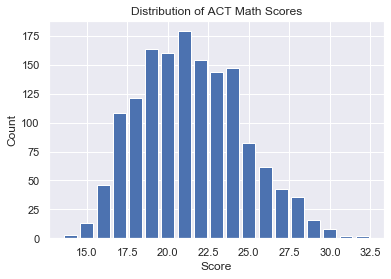

In [32]:
act_score_count = act.loc[act['AvgScrMath']!='*']['AvgScrMath'].\
dropna().astype('int').value_counts().sort_values('index')

plt.bar(act_score_count.index, height=act_score_count)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of ACT Math Scores');

### Question 6b

Describe the qualities of the distribution of the ACT scores based on your bar plot. Consider the mode(s), symmetry, tails, gaps, and anamolous values. Are there any unusual features of this distribution? What do your observations imply about the scores?

---
## 7: Investigate the Demographics Data

Let's now turn to the demographics DataFrame. In this section, we determine the granularity of `dem` and investigate the kinds of information provided for school demographics. Let's start by looking again at the first 5 rows of `dem` to see what we're working with.

In [33]:
dem.head()

,CDS_CODE,ETHNIC,GENDER,ENR_TOTAL
0,6615986003495,5,F,163
1,6615986003495,1,F,3
2,6615986003495,9,M,2
3,6615986003495,7,M,45
4,6615986003495,5,M,179


### Question 7a
From calling `head`, we know that each row in this table corresponds to a single gender and race. Let's get a sense of the total number of observations, as well as the total number of unique schools that occur in the dataset.

In [105]:
# The number of rows in ins
rows_in_table  = dem.shape[0]
print(rows_in_table)

# The number of unique business IDs in ins.
unique_dem_ids = dem['CDS_CODE'].value_counts().shape[0]
print(unique_dem_ids)

130220
10521


### Question 7b

Next, we examine the Series in the `dem` dataframe called `ETHNIC`. From examining the first few rows of `ETHNIC`, we see that `ETHNIC` is a integer with values ranging from 1 to 9, presumably representing some ethnic category. What values does this column take? How many occurrences of each value is in the DataFrame? What are the implications for further analysis? (Refer to https://www.cde.ca.gov/ds/sd/sd/fsenr.asp for explanations on the file structure.)

### Question 7c

Let's now count the proportion of each ethnic group for every school.

Create a new dataframe of counts of the ethnic/gender category and proportion of that group, storing the result in `fraction_ethnic_df`. It should have an index called `CDS_CODE` and should also have 4 columns:

1. `ethnic`: The ethnic group of interest.
2. `gender`: The gender group of interest.
3. `count`: The number of students belonging to the specified ethnic group.
4. `fraction_count`: The fraction of students belonging to the specified ethnic group.

Your data frame should be sorted by the fraction count in descending order.

Recommended approach: Build a new dataframe with total number of students for each school and join the table with elements of the the original `dem` dataframe. From there, you can extend the resulting table to compute the fraction of the given ethnic group. This will require some new syntax you may not have seen.

*Hint*: You can use the divison operator to compute the ratio of two series.

In [52]:
total_students = pd.DataFrame(dem.groupby('CDS_CODE').sum()['ENR_TOTAL'])
total_students.columns = ['count_total']
new_table = dem.join(total_students, on='CDS_CODE')
new_table['fraction_count'] = new_table['ENR_TOTAL'] / new_table['count_total']
new_table = new_table.set_index('CDS_CODE')
new_table = new_table.drop('count_total',axis=1)
new_table.columns = ['ethnic','gender','count','fraction_count']
new_table.head()

,ethnic,gender,count,fraction_count
CDS_CODE,,,,
6615986003495,5,F,163,0.367117
6615986003495,1,F,3,0.006757
6615986003495,9,M,2,0.004505
6615986003495,7,M,45,0.101351
6615986003495,5,M,179,0.403153


### Question 7d

Let's start by creating a new dataframe called `dem_named`. It should be exactly the same as `dem`, except that it should have the name and average ACT Math Score of every school, as determined by the `sch` dataframe. If a `CDS_CODE` in `dem` does not exist in `sch`, the name and average ACT Math score should be given as NaN. 

Find the names of five schools with the highest fraction of male, Hispanic students (Ethnic code 5) with more than 10 students falling into the category. Repeat the same exercise with male, Asian students and comment on the differences you observe. Specifically, how do `count` and `fraction_count` columns differ in the two tables?

*Hint: Use the merge method to join the `dem` dataframe with the appropriate portion of the `sch` dataframe.*

In [88]:
new_table_2 = pd.merge(new_table, sch[['CDSCode','School','AvgScrMath']], \
                       left_on='CDS_CODE', right_on='CDSCode', how='left')
new_table_2 = new_table_2.loc[(new_table_2['ethnic']==5) & (new_table_2['gender']=='M') & \
                              (new_table_2['count']>10)]
new_table_2.sort_values(by='fraction_count', ascending=False).head()

,ethnic,gender,count,fraction_count,CDSCode,School,AvgScrMath
114696,5,M,31,0.911765,3.066671e+13,REACH Academy,NaN
126425,5,M,38,0.904762,1.964519e+13,El Monte Union High School Community Day,NaN
82353,5,M,18,0.900000,1.310132e+13,Imperial County Juvenile Hall/Community,NaN
97486,5,M,46,0.884615,2.710272e+13,"Wellington M. Smith, Jr.",NaN
52336,5,M,18,0.857143,1.075127e+13,Mendota Continuation High,NaN


Repeating the same exercise for male, Asian students (Ethnic code 2).

In [89]:
new_table_2 = pd.merge(new_table, sch[['CDSCode','School','AvgScrMath']], \
                       left_on='CDS_CODE', right_on='CDSCode', how='left')
new_table_2 = new_table_2.loc[(new_table_2['ethnic']==2) & (new_table_2['gender']=='M') & \
                             (new_table_2['count']>10)]
new_table_2.sort_values(by='fraction_count', ascending=False).head()

,ethnic,gender,count,fraction_count,CDSCode,School,AvgScrMath
85292,2,M,27,0.540000,3.868479e+13,Lee (Edwin and Anita) Newcomer,NaN
22617,2,M,293,0.514035,4.369420e+13,Murdock-Portal Elementary,NaN
125129,2,M,367,0.500000,1.611766e+12,Joshua Chadbourne Elementary,NaN
24438,2,M,344,0.494964,4.369420e+13,William Faria Elementary,NaN
66729,2,M,416,0.485414,1.611766e+12,James Leitch Elementary,NaN


---
## 8: Relationship Between Demographics and ACT Scores

### Question 8a

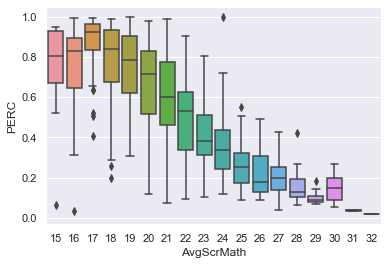

In [83]:
hisp = dem.loc[dem['ETHNIC'] == 5].groupby('CDS_CODE').sum()['PERC']
merge = pd.merge(act, hisp, left_on='cds', right_on='CDS_CODE')[['PERC', 'AvgScrMath']].dropna().sample(1000)
sns.boxplot(merge['AvgScrMath'], merge['PERC'], order=['15','16','17','18','19',\
                                                       '20','21','22','23','24','25',\
                                                       '26','27','28','29','30','31','32'])

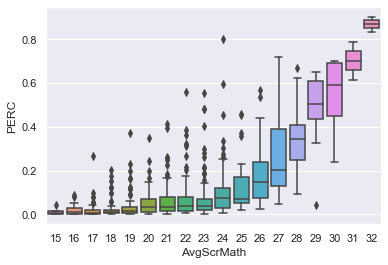

In [85]:
asian = dem.loc[dem['ETHNIC'] == 2].groupby('CDS_CODE').sum()['PERC']
merge = pd.merge(act, asian, left_on='cds', right_on='CDS_CODE')[['PERC', 'AvgScrMath']].dropna().sample(1000)
sns.boxplot(merge['AvgScrMath'], merge['PERC'], order=['15','16','17','18','19',\
                                                       '20','21','22','23','24','25',\
                                                       '26','27','28','29','30','31','32'])